<p style="text-align: center;"><font size="8"><b>Functions</b></font><br>


Functions are the most general purpose control structure. We have already seen several functions, for example `abs(x)` returns the absolute value of x. Today we will look at creating our own functions.

Let's say that we want to convert a temperature in Fahrenheit to Celcius. In assignment 1 you were given the formula

$$ C = \frac{5}{9}(F - 32).$$

That is, given a temperature in Fahrenheit $F$ we can compute the temperature in Celcius.

In [1]:
F = 88
C = 5/9*(F - 32)
print(C)

31.111111111111114


We could also define a function, say `FtoC` that does the same thing:

In [3]:
def FtoC(F):
    C = 5/9*(F-32)
    return C

FtoC(88)

31.111111111111114

Functions are declared with the keyword `def` (short for define). It is followed by the name of the function, here `FtoC`. Parentheses enclose a series of parameters that are passed in by the caller (F). If a function does not require any parameters there must still be opening and closing parentheses. Finally an indented body contains the code that is executed when the fucntion is called.

## Parameters

We are free to choose the names of the parameters. The name we give a parameter is known as a *formal parameter*; it serves as a placeholder for a piece of information from the caller, known as the *actual parameter*. We cannot assume to know the name of the variable name used by the caller. In fact when we call `FtoC(88)`, the actual parameter has a value of 88, but no name. 

In general formal parameter names should be chosen in such a way as to suggest their meaning. That's why we chose `F` in the function above; we could also have chosen `far` or `fahrenheit`. 

Each time our function is called the formal parameter `F` gets assigned the value 

As with if statements, the condition can be an arbitarary boolean expression and the body is an indented block of code.

![while statement flow chart](images/while_flow.png)

### Default parameters

## Lambda Functions

Functions that are only one line can be defined inline using *lambda functions*. For example the function `FtoC` could be defined in single line by:

In [10]:
FtoC = lambda F: 5/9*(F-32)

FtoC(88)

31.111111111111114

Lambda functions are useful in scientific computing because they allow us to quickly create simple functions to pass in as arguments to other functions. We'll see an example of this shortly.

# Newton's Method

Newton's method is a simple yet highly efficient method for finding the roots (i.e. the zeros) of a function $f(x)$. Starting from an initial point $x_0$, the following sequence of values converges $x^*$, where $f(x^*)=0$:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$



That is, given $x_0$ we can find $x_1$, which is closer to $x^*$:

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}.$$

Once we have $x_1$ we can repeat the process to find $x_2$ and then $x_3$ etc. We repeat this process until:

a) $f(x_k)$ is close to 0, and

b) $|x_{k+1} - x_{k}|$ is small

Unfortunately, there is no guarantee that either of these conditions will ever be satisfied. To aovid an infinite loop we also add am iteration counter. If this counter goes above a certain value the loop exits and an error message is printed.

Let's look at a concrete example. Let's say we want to approximate $\sqrt{2}$. We can do this using Newton's method. 

We let $x^2 = 2$. This means that $f(x) = x^2 - 2 = 0$. 

This gives $f'(x) = 2x$. Let's take our initial guess to be $x_0 = 1$. 

[1, 1.5, 1.4166666666666667, 1.4142156862745099, 1.4142135623746899]
[-1, 0.25, 0.006944444444444642, 6.007304882871267e-06, 4.510614104447086e-12]
actual error: 1.5947243525715749e-12


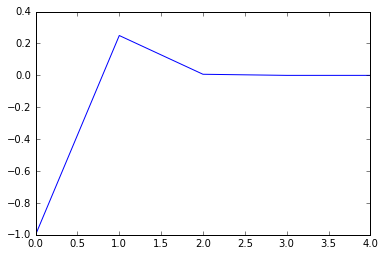

In [9]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

# declare maximum number of iterations and tolerance
IMAX = 20
TOL = 1e-5

# create a list to store the approximations to the root and function values
x = []
f = []

# append intial guess
x.append(1)
f.append(x[0]**2 - 2)

# set iteration counter
icount = 0

# intitialize diff to be some number bigger than TOL
diff = 2*TOL

# loop
while (abs(f[icount]) > TOL or diff > TOL) and icount < IMAX:
    x_next = x[icount] - (x[icount]**2 - 2)/(2*x[icount])
    x.append(x_next)
    f.append(x_next**2 -2)
    
    diff = abs(x_next - x[icount])
    icount = icount + 1

print(x)
print(f)
plt.plot(f)

print("actual error:", abs(math.sqrt(2)-x[-1]))

Of course we don't need to store all the previous values of $f$ and $x$. Often we are not interested in them. An alternative implementation would look like:

In [8]:
# declare maximum number of iterations and tolerance
IMAX = 20
TOL = 1e-5

# declare initial guess
x0 = 1

# set iteration counter
icount = 0

# intitialize diff to be some number bigger than TOL
diff = 2*TOL

# loop
while (x0**2 + -2 > TOL or diff > TOL) and icount < IMAX:
    x1 = x0 - (x0**2 -2)/(2*x0)
    
    diff = abs(x0 - x1)
    x0 = x1
    icount = icount + 1
    
print("square root of 2 = ", x1)

square root of 2 =  1.4142135623746899


## Implementation With Functions

This works quite well. However, what if instead of approximating $\sqrt{2}$, we wanted to solve $x^3 - 9x + \cos(x) = 0$?

We would have to rewrite the code above and plug in a new $f(x)$ and $f'(x)$. If we write our code using functions, we can keep the code flexible and capable of solving different problems. 

Consider the following function:

In [16]:
def newton_step(x0, f, df):
    return x0 - f(x0)/df(x0)

This is a single iteration. 

We can create a function to do the entire Newton method:

In [31]:
def newtons_method(x0, f, df, tol=1e-5, max_it=20):

    # intitialize iteration counter to 0
    icount = 0

    # intitialize diff to be some number bigger than TOL
    diff = 2*tol

    # loop
    while (f(x0) > TOL or diff > TOL) and icount < IMAX:
        x1 = newton_step(x0, f, df)
    
        diff = abs(x0 - x1)
        x0 = x1
        icount = icount + 1
        
    return x1

Let's use this code to compute $\sqrt{2}$.

In [32]:
x = newtons_method(1, lambda x: x**2 - 2, lambda x: 2*x)
print(x)

1.4142135623746899


By changing just two inputs we can also now compute the solution to the equation $x^3-9x+\cos(x)=0$. 

In [33]:
x = newtons_method(1, lambda x: x**3 - 9*x + math.cos(x), lambda x: 3*x**2 - 9 - math.sin(x))
print(x)

0.11058269180669812


## Docstrings

Docstrings are a way to provide automatic documentation for a function. Without going into too much detail, after you declare a function you can enclose a series of comments inside triple quotes ("""). Whatever you type here will be printed when you call `help(function)`. 

For example the a docstring for the function `newton_step` might look like:

In [29]:
def newton_step(x0, f, df):
    """
    Take a single Newton step starting from x0
    
    Parameters
    ----------
    x0 : float
        initial approximation
    f  : function
        f(x)
    df : function
        f'(x)
        
    Returns
    -------
    x1 : float
        a better approximation using Newton's method
    
    """
    return x0 - f(x0)/df(x0)

Calling the help function then prints:

In [30]:
help(newton_step)

Help on function newton_step in module __main__:

newton_step(x0, f, df)
    Take a single Newton step starting from x0
    
    Parameters
    ----------
    x0 : float
        initial approximation
    f  : function
        f(x)
    df : function
        f'(x)
        
    Returns
    -------
    x1 : float
        a better approximation using Newton's method



There is no required formatting for the docstring, but it should be readable and provide enough information for a user to understand and use the function. A discussion on some conventions is availiable [here](https://www.python.org/dev/peps/pep-0257/). 

Don't get too caught up in the exact format of your docstring, clarity is the most important part. Its always better to have some sort of docstring than none at all. Find a style you like and stick to that.